# Project1_DecisionTree_RandomForest_KyphosisDataSet

### A). Project Overview

* `Description:`
The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. This data frame contains the following columns:

* `Kyphosis:` a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.
* `Age:` in months
* `Number:`the number of vertebrae involved
* `Start:`the number of the first (topmost) vertebra operated on.

### B). Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read the data and show head of the data

In [2]:
df = pd.read_csv("Input_Data/kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
#check datatype and null info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [4]:
#check statistical info
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


### 3). EDA

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


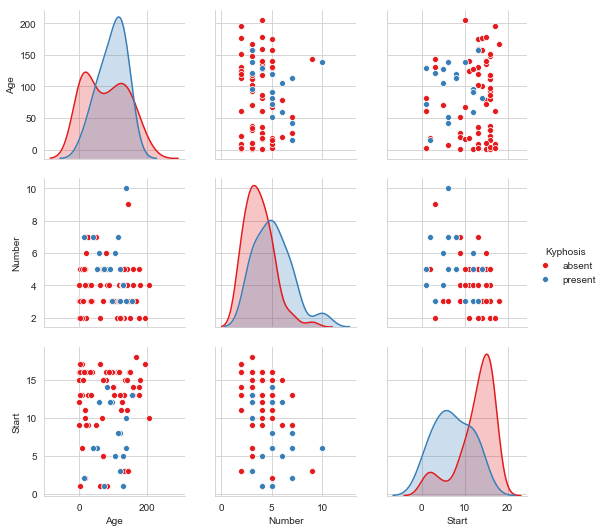

In [9]:
#pairplot for dataset

sns.set_style('whitegrid')
sns.pairplot(df, hue='Kyphosis', palette='Set1')

### 4). Train Test Split

In [10]:
#create X, y variables

X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [11]:
#import train_test_split and variable assignment

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
#print the sizes of each variable
print("X_train Size = ",X_train.shape )
print("X_test Size = ",X_test.shape , "\n")

print("y_train Size = ",y_train.shape )
print("y_test Size = ",y_test.shape )

X_train Size =  (56, 3)
X_test Size =  (25, 3) 

y_train Size =  (56,)
y_test Size =  (25,)


### 5). Decision Trees

In [18]:
from sklearn.tree import DecisionTreeClassifier

#### create an instance and fit the trained data

In [19]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Prediction and Evaluation for DecisionTrees

In [22]:
tree_predictions = dtree.predict(X_test)

In [24]:
#import classification_report, confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print("classification_report :\n", classification_report(y_test, tree_predictions), "\n\n")

print("confusion_matrix :\n", confusion_matrix(y_test, tree_predictions))

classification_report :
               precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

   micro avg       0.60      0.60      0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25
 


confusion_matrix :
 [[13  4]
 [ 6  2]]


### 6). Random Forest

#### Import and create an instance and fit with train data

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Prediction and Evaluation for Random Forest

In [29]:
rfc_predictions = rfc.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print("classification_report :\n", classification_report(y_test, rfc_predictions), "\n\n")

print("confusion_matrix :\n", confusion_matrix(y_test, rfc_predictions))

classification_report :
               precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

   micro avg       0.76      0.76      0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25
 


confusion_matrix :
 [[17  0]
 [ 6  2]]
